title: "World-happiness-report"
author: "Rafaat Choki"
date: "2024-07-02"

## Einleitung

In dieser Analyse untersuchen wir die Entwicklung von Smartphones über die Jahre hinweg und die Zusammenhänge zwischen verschiedenen technischen Merkmalen. Unser Ziel ist es, zu verstehen, wie sich die Spezifikationen von Smartphones verändert haben, um den steigenden Anforderungen der Nutzer gerecht zu werden. Dazu werden wir die Daten bereinigen, explorativ analysieren, Hypothesen testen und statistische Modelle verwenden, um die wichtigsten Trends und Korrelationen in den Smartphone-Daten zu identifizieren.

### Hypothesen


**1. Hypothese:** **Größere Akkukapazität ist mit größeren Displays verbunden.**

   - **Erklärung:** Diese Hypothese nimmt an, dass Smartphones mit größeren Displays auch größere Akkus benötigen, um den zusätzlichen Energieverbrauch auszugleichen. Größere Bildschirme bieten eine bessere Benutzererfahrung, erfordern jedoch mehr Energie, was eine größere Batterie erforderlich macht, um eine angemessene Akkulaufzeit zu gewährleisten.

**2. Hypothese:** **Smartphones mit höherer Display-Auflösung bieten auch eine höhere Bildwiederholrate (Display_Refresh_Rate).**

   - **Erklärung:** Diese Hypothese nimmt an, dass Smartphones mit einer höheren Display-Auflösung (höherer Pixelwert) auch eine höhere Bildwiederholrate aufweisen. Geräte mit einer besseren Display-Technologie erfordern möglicherweise auch eine verbesserte Bildwiederholrate, um die hohe Auflösung flüssig darzustellen und eine bessere visuelle Erfahrung zu bieten.

**3. Hypothese:** Der **Primary_Storage**, **Memory**, **Primary_Camera**, **Front_Camera**, **Battery**, **Display_Refresh_Rate**, und **Display_Resolution** von Smartphones haben sich im Laufe der Jahre vergrößert, um den steigenden Anforderungen der Nutzer gerecht zu werden.

   - **Erklärung:** Diese Hypothese besagt, dass die wichtigsten technischen Merkmale von Smartphones (Speicher, Kameraauflösungen, Akkukapazität, Displayauflösungen und Bildwiederholraten) mit den Jahren gewachsen sind, um mit der wachsenden Nachfrage nach leistungsfähigeren Geräten und besseren Nutzererfahrungen Schritt zu halten. Dies könnte auf den zunehmenden Bedarf an Speicherplatz für größere Apps, bessere Kameraqualität und längere Akkulaufzeiten hinweisen.

### Vorgehensweise

**Datenimport**: Wir importieren die notwendigen Daten und Bibliotheken.

**1. Datenvorbereitung und Bereinigung**: 
Wir beginnen mit der Datenvorbereitung, indem wir sicherstellen, dass alle relevanten Spalten korrekt formatiert sind und keine fehlenden oder fehlerhaften Werte enthalten. Insbesondere müssen Spalten wie `Primary_Storage`, `Memory`, `Primary_Camera`, `Battery`, `Display_Resolution` und `Display_Refresh_Rate` überprüft und bereinigt werden. Falls nötig, konvertieren wir `Display_Resolution` in numerische Werte (z. B. Gesamtpixelanzahl), um eine einfachere Analyse zu ermöglichen.

**2. Explorative Datenanalyse**:
Nach der Bereinigung analysieren wir die Daten mithilfe von deskriptiver Statistik und Visualisierungen, um die Entwicklung der Smartphone-Technologien über die Jahre hinweg zu verstehen. Wir erstellen Diagramme wie Scatterplots, Boxplots und Liniencharts, um Trends und Korrelationen zwischen den wichtigsten Merkmalen zu erkennen. Dies umfasst die Untersuchung, wie sich `Primary_Storage`, `Memory`, `Primary_Camera`, `Battery` und andere Merkmale im Laufe der Jahre verändert haben.

**3. Korrelation und Trendanalyse**:
Wir analysieren die Korrelationen zwischen verschiedenen Merkmalen, um festzustellen, ob es signifikante Zusammenhänge gibt, z. B. ob größere Akkus mit größeren Displays oder höheren Bildwiederholraten korrelieren. Zusätzlich verwenden wir Trendlinien, um die Entwicklung bestimmter Merkmale über die Jahre hinweg darzustellen.

**4. Lineare Regression zur Schätzung der Entwicklung**:
Um die Beziehungen zwischen den verschiedenen Merkmalen und deren Veränderungen im Laufe der Zeit zu quantifizieren, verwenden wir lineare Regression. Diese hilft uns, die wichtigsten Faktoren zu identifizieren, die für das Wachstum von `Primary_Storage`, `Battery`, `Display_Resolution` und anderen Merkmalen verantwortlich sind. Zudem können wir die Bedeutung von Faktoren wie Displaygröße und Kameraauflösung im Zusammenhang mit anderen technischen Eigenschaften analysieren.

**5. Hypothesen testen**:
Wir überprüfen unsere Hypothesen mithilfe von statistischen Tests und Visualisierungen. Beispielsweise testen wir, ob der Zusammenhang zwischen Akkukapazität und Displaygröße signifikant ist oder ob Smartphones mit höherer Displayauflösung tatsächlich eine höhere Bildwiederholrate aufweisen.

## Hauptteil

### 1. Daten import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = pd.read_csv("D:/Programming Projects/HTW-Notes/Semester 4/Ki werkstatt/phones_analysis/data/smartphones.csv")

### 1. Datenvorbereitung

**1.1. Allgemeine Informationen zu den Daten anzeigen:**
    
   - **Grund:** Bevor wir mit der eigentlichen Datenanalyse beginnen, ist es wichtig, einen Überblick über die Struktur und den Inhalt unserer Daten zu erhalten. Dies hilft uns, mögliche Probleme wie fehlende Werte, falsche Datentypen oder unvollständige Einträge zu erkennen und diese entsprechend zu behandeln.

   - **Beobachtung:** Die Daten beinhalten eine Vielzahl von technischen Spezifikationen für Smartphones. Einige Spalten enthalten fehlende Werte (z.B. `Processor`, `Front_Camera`, `Display_Refresh_Rate`), was darauf hindeutet, dass bestimmte Geräte in diesen Bereichen keine Angaben haben oder die Information nicht erfasst wurde. Zudem sind einige Spalten als Zeichenketten (Strings) formatiert, obwohl sie numerische Werte enthalten sollten (z.B. `Display_Resolution`), was zu potenziellen Schwierigkeiten bei der Analyse führen kann.
    
   - **Code:**

In [ ]:
# Allgemeine Informationen zu den Daten anzeigen
data.info()
data.describe()

In [ ]:
# Daten nach erscheinungsdatum sortieren
data_sorted = data.sort_values(by='Release_Date', ascending=False)

# Ein kurzer Blick auf die ersten Zeilen der Daten
data_sorted.head()

In [ ]:
# Ein kurzer Blick auf die letzen Zeilen der Daten
data_sorted.tail()

**1.2. Analyse der Spalten und Entfernen irrelevanter Spalten**

  - **Grund:** Bevor wir mit der eigentlichen Analyse fortfahren, ist es wichtig, die verschiedenen Spalten zu überprüfen und zu entscheiden, ob sie für die Analyse notwendig sind. Einige Spalten, die wenig bis keine Variation in den Daten aufweisen oder für die Analyse irrelevant sind, können entfernt werden, um den Datensatz zu optimieren und die Analyse zu vereinfachen.
  
  - **Beobachtung:** Die Spalte `External_Storage` wird für die Analyse irrelevant sein. Es gibt auch doppelte Einträge für "not expandable" sowie leere Werte (7,8%).

  - **Code:**

In [ ]:
# Prozentsatz der verschiedenen Werte in der Spalte 'External_Storage'
external_storage_unique_percentage = data['External_Storage'].value_counts(normalize=True) * 100

# Ausgabe der verschiedenen Werte und deren Prozentsatz
print("Prozentuale Verteilung der verschiedenen Werte in 'External_Storage':")
print(external_storage_unique_percentage)

# Wenn die Spalte irrelevant ist, löschen wir sie
data = data.drop(columns=['External_Storage'])

# Überprüfen, ob die Spalte 'External_Storage' noch existiert
print(f"Existiert die Spalte 'External_Storage' noch? {'External_Storage' in data.columns}")

**1.3. Umwandlung der Display-Auflösung in numerische Werte**

  - **Grund:** Um die Hypothese zu überprüfen, dass Smartphones mit höherer Display-Auflösung auch eine höhere Bildwiederholrate (Display_Refresh_Rate) bieten, müssen wir die `Display_Resolution`-Daten in eine numerische Form bringen. Die aktuelle Darstellung der Auflösung als Zeichenkette (z. B. "1280 x 720") hindert uns daran, eine statistische Analyse durchzuführen. Durch das Aufteilen der Auflösung in Breite und Höhe sowie der Berechnung der Gesamtauflösung können wir die Daten numerisch auswerten und die Hypothese validieren.

  - **Code:**

In [ ]:
# Schritt 1: Display_Resolution aufteilen in Breite und Höhe
data[['Resolution_Width', 'Resolution_Height']] = data['Display_Resolution'].str.split(' x ', expand=True)

# Schritt 2: Umwandlung in numerische Werte
data['Resolution_Width'] = pd.to_numeric(data['Resolution_Width'], errors='coerce')
data['Resolution_Height'] = pd.to_numeric(data['Resolution_Height'], errors='coerce')

# Schritt 3: Berechnung der Gesamtauflösung
data['Total_Resolution'] = data['Resolution_Width'] * data['Resolution_Height']

# Überprüfen der ersten Zeilen
data[['Display_Resolution', 'Resolution_Width', 'Resolution_Height', 'Total_Resolution']].head()

**1.4. Vereinheitlichung und Analyse fehlender Werte**

  - **Grund:** Um eine konsistente und genaue Analyse zu gewährleisten, sollten alle fehlenden Werte im Datensatz einheitlich als `NULL` dargestellt werden. In unserem Fall können fehlende Werte durch verschiedene Platzhalter wie leere Zeichenfolgen (`''`), spezielle Werte (`NaN`) oder ungenutzte Platzhalter wie `not available` gekennzeichnet sein. Durch die Umwandlung aller dieser Werte in `NULL` wird die Behandlung fehlender Daten standardisiert und vereinfacht. Anschließend zählen wir die fehlenden Werte in jeder Spalte, um die Datenqualität und potenzielle Lücken im Datensatz zu evaluieren.

  - **Beobachtung:** Die Umwandlung aller fehlenden Werte zu `NULL` zeigt, dass die Spalten `Display_Refresh_Rate` und `Processor` eine hohe Anzahl fehlender Werte aufweisen. Die Spalte `Display_Refresh_Rate` hat 1585 fehlende Einträge, was etwa 85% der Gesamtzahl entspricht, und `Processor` hat 205 fehlende Einträge, etwa 11% des Datensatzes. Die übrigen fehlenden Werte verteilen sich auf `OS`, `Display_Resolution`, `Front_Camera`, `Resolution_Width`, `Resolution_Height` und `Total_Resolution`, wobei der Anteil der fehlenden Werte in diesen Spalten im Vergleich gering ist. 

  - **Code:**

In [ ]:
# Schritt 1: Alle Variationen fehlender Werte zu `NaN` umwandeln
data = data.replace(['', 'Missing value', 'not available', 'NA', 'N/A'], pd.NA)

# Schritt 2: Anzahl der fehlenden Werte in jeder Spalte berechnen
missing_counts = data.isna().sum()

# Schritt 3: Visualisierung der fehlenden Werte
missing_counts

**1.5. Entfernung unvollständiger Einträge (Geräte ohne OS oder Display_Resolution)**

  - **Grund:** Um sicherzustellen, dass die analysierten Daten vollständig sind und um die Validität der Analysen zu verbessern, entfernen wir alle Geräte, denen entweder das Betriebssystem (`OS`) oder die Display-Auflösung (`Display_Resolution`) fehlt. Da diese beiden Merkmale essenziell für die folgenden Analysen sind, sind diese Einträge für unsere Zwecke nicht hilfreich und könnten die Analyseergebnisse verfälschen.

  - **Code:**

In [ ]:
# Geräte ohne OS oder Display_Resolution entfernen
data = data.dropna(subset=['OS', 'Display_Resolution'])

# Überprüfen der Anzahl der verbleibenden fehlenden Werte nach der Entfernung
missing_counts_after_removal = data.isna().sum()
missing_counts_after_removal

**1.5. Behandlung fehlender Display-Refresh-Rate-Werte**

  - **Grund:** Die Bildwiederholrate (`Display_Refresh_Rate`) ist ein wichtiger Faktor für die Bewertung der Bildschirmqualität, jedoch fehlt dieser Wert für viele Geräte in unserem Datensatz. Da 60Hz als Standard-Bildwiederholrate für ältere Smartphones (wie das erste iPhone) weit verbreitet ist, könnten wir fehlende Werte sinnvollerweise auf 60Hz setzen, anstatt die Einträge zu löschen. Dies sorgt für Konsistenz und ermöglicht die Einbeziehung dieser Geräte in Analysen, ohne sie fälschlicherweise als High-Refresh-Rate-Geräte zu klassifizieren.

  - **Code:**

In [ ]:
# Create a copy of the original dataset for cleaned data
cleaned_data = data.copy()

# Fill missing values in 'Display_Refresh_Rate' with 60Hz
cleaned_data['Display_Refresh_Rate'] = cleaned_data['Display_Refresh_Rate'].fillna(60)

# Verify if all missing values in 'Display_Refresh_Rate' are filled
missing_counts_after_fill = cleaned_data.isna().sum()
missing_counts_after_fill

### 2 Explorative Datenanalyse (EDA)

**2.1 Untersuchung der Verteilung wichtiger Kategorien**

  - **Grund:** Um die Verteilung der wichtigsten Kategorien wie `Brand`, `OS`, `Processor` und `Display_Resolution` besser zu verstehen, erstellen wir Balkendiagramme für diese Spalten. Dies ermöglicht uns, die Häufigkeit der verschiedenen Werte in jeder Kategorie visuell darzustellen und potenzielle Muster oder Ungleichgewichte zu erkennen.

  - **Beobachtung:**
    1. `Marken (Brand):` Samsung dominiert den Datensatz mit fast doppelt so vielen Geräten wie die zweitplatzierte Marke LG. Auch Motorola und Xiaomi sind überdurchschnittlich vertreten. Überraschenderweise liegt Apple nur auf Platz 17.

    2. `Betriebssysteme (OS):` Android ist mit etwa 95% klar führend, während Windows doppelt so viele Geräte wie iOS repräsentiert. Die geringe Anzahl an iOS-Geräten ist auffällig.
          
    3. `Prozessoren (Processor):` Qualcomm ist mit über doppelt so vielen Geräten wie der zweitplatzierte MediaTek deutlich dominant, was wenig überraschend ist, da Apple-Produkte weniger vertreten sind.
      
    4. `Display-Auflösungen (Display_Resolution):` 1280 x 720 und 1920 x 1080 dominieren, was typisch für Mittelklasse- und ältere Geräte ist. Höhere Auflösungen wie 2560 x 1440 sind seltener und vor allem in Premium-Modellen zu finden.

  - **Code:**

In [ ]:
# Funktion zur Filterung der höchsten 90% basierend auf den Häufigkeiten
def filter_top_90_percent(data, column):
    value_counts = data[column].value_counts(normalize=True).cumsum()
    top_90_percent_values = value_counts[value_counts <= 0.9].index
    return data[data[column].isin(top_90_percent_values)]

# Festlegen des Diagramm-Layouts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Verteilung der Marken (Brand) - Top 90%
brand_data = filter_top_90_percent(cleaned_data, 'Brand')
sns.countplot(y='Brand', data=brand_data, order=brand_data['Brand'].value_counts().index, 
              ax=axes[0, 0], palette='coolwarm_r')
axes[0, 0].set_title('Verteilung der häufigsten Marken (Top 90%)')
axes[0, 0].set_xlabel('Anzahl')
axes[0, 0].set_ylabel('Brand')

# Verteilung der Betriebssysteme (OS)
sns.countplot(y='OS', data=cleaned_data, order=cleaned_data['OS'].value_counts().index, 
              ax=axes[0, 1], palette='coolwarm_r')
axes[0, 1].set_title('Verteilung der Betriebssysteme')
axes[0, 1].set_xlabel('Anzahl')
axes[0, 1].set_ylabel('OS')

# Verteilung der Prozessoren (Processor)
sns.countplot(y='Processor', data=cleaned_data, order=cleaned_data['Processor'].value_counts().index, 
              ax=axes[1, 0], palette='coolwarm_r')
axes[1, 0].set_title('Verteilung der Prozessoren')
axes[1, 0].set_xlabel('Anzahl')
axes[1, 0].set_ylabel('Processor')

# Verteilung der Display-Auflösungen (Display_Resolution) - Top 90%
resolution_data = filter_top_90_percent(cleaned_data, 'Display_Resolution')
sns.countplot(y='Display_Resolution', data=resolution_data, order=resolution_data['Display_Resolution'].value_counts().index, 
              ax=axes[1, 1], palette='coolwarm_r')
axes[1, 1].set_title('Verteilung der häufigsten Display-Auflösungen (Top 90%)')
axes[1, 1].set_xlabel('Anzahl')
axes[1, 1].set_ylabel('Display_Resolution')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

**2.2 Analyse der Verteilung wichtiger technischer Merkmale**

  - **Grund:** Um ein besseres Verständnis für die Verteilung und mögliche Ausreißer der verschiedenen technischen Merkmale wie `Battery`, `Memory`, `Primary_Storage`, `Display_Size`, `Display_Refresh_Rate`, `Primary_Camera`, `Front_Camera` und `Total_Resolution` zu erhalten, werden Boxplots und Histogramme erstellt. Diese Visualisierungen helfen uns, die zentrale Tendenz, Streuung und Ausreißer dieser Merkmale zu erkennen, sodass wir die Daten besser interpretieren und fundierte Entscheidungen treffen können.

  - **Beobachtungen:**  
  
    1. `Battery` zeigt eine breite Verteilung der Kapazitäten, mit einem erheblichen Bereich von Werten (800 mAh bis 8380 mAh) und einigen Ausreißern, was auf sehr unterschiedliche Akkugrößen hinweist. Besonders auffällig sind die 5 Ausreißer.
  
    2. `Memory` variiert von 0.1 GB bis 18 GB, mit einem Median von 2 GB, was auf eine breite Palette an Geräten mit unterschiedlichen Speicherkapazitäten hinweist. Es gibt 39 Ausreißer in den Daten.

    3. `Primary_Storage` hat einen Median von 32 GB, aber die Spanne reicht bis 512 GB, was eine große Vielfalt an Speichergrößen zeigt. Besonders auffällig sind die 94 Ausreißer, die auf Geräte mit außergewöhnlich hohen Speicherkapazitäten hinweisen.

    4. `Display_Size` variiert mit einem Median von 5,5 Zoll, wobei größere Displays seltener sind. Die 12 Ausreißer deuten auf besonders kleine oder große Displays hin.

    5. `Display_Refresh_Rate` zeigt eine hohe Konzentration von Geräten mit einer Refresh-Rate von 60 Hz, wobei die Ausreißer bis zu 165 Hz reichen. Mit 207 Ausreißern sehen wir eine große Bandbreite an unterschiedlichen Display-Refresh-Raten.

    6. `Primary_Camera` zeigt eine breite Streuung der Kamerauflösungen, mit einem Median von 13 MP und einem Maximalwert von 108 MP. Hier gibt es eine hohe Anzahl an Ausreißern (346), was auf eine große Variation in den Kamerasystemen hinweist.

    7. `Front_Camera` hat einen Median von 5 MP, mit einer breiten Verteilung von 0,3 MP bis 60 MP. Auch hier gibt es 102 Ausreißer, die eine große Spannweite an Frontkameras zeigen.

    8. `Total_Resolution` (Gesamtauflösung) variiert von 76800 bis 8294400 Pixel, mit einem Median von 1.094.400 Pixel. Mit 9 Ausreißern, die auf Geräte mit besonders hoher Gesamtauflösung hinweisen, zeigt sich eine starke Variabilität.

  - **Code:**  

Anzahl der Ausreißer für Battery: 5
Anzahl der Ausreißer für Memory: 39
Anzahl der Ausreißer für Primary_Storage: 94
Anzahl der Ausreißer für Display_Size: 12
Anzahl der Ausreißer für Display_Refresh_Rate: 207
Anzahl der Ausreißer für Primary_Camera: 346
Anzahl der Ausreißer für Front_Camera: 102
Anzahl der Ausreißer für Total_Resolution: 9


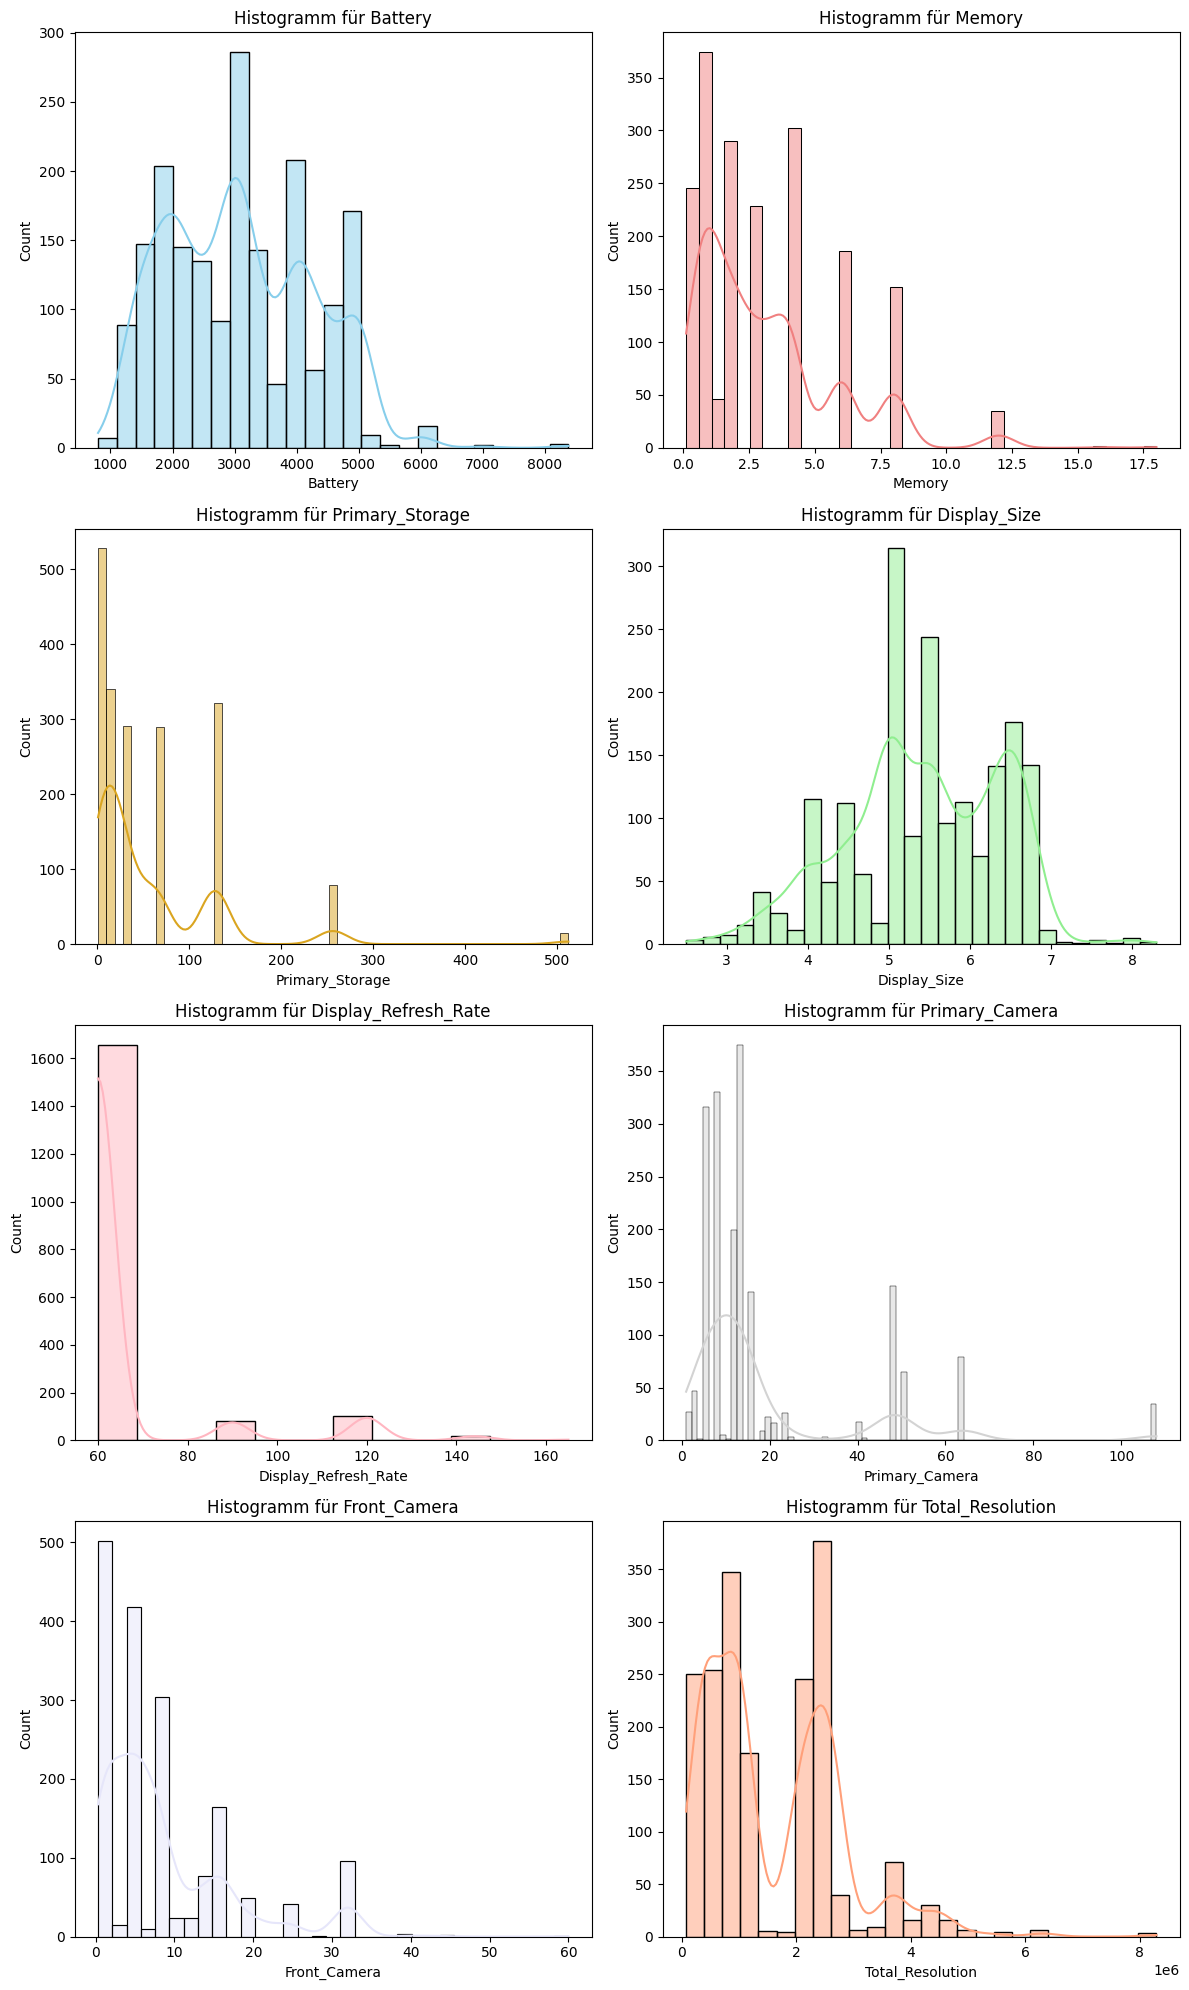

Anzahl der Ausreißer für Battery: 5
Anzahl der Ausreißer für Memory: 39
Anzahl der Ausreißer für Primary_Storage: 94
Anzahl der Ausreißer für Display_Size: 12
Anzahl der Ausreißer für Display_Refresh_Rate: 207
Anzahl der Ausreißer für Primary_Camera: 346
Anzahl der Ausreißer für Front_Camera: 102
Anzahl der Ausreißer für Total_Resolution: 9


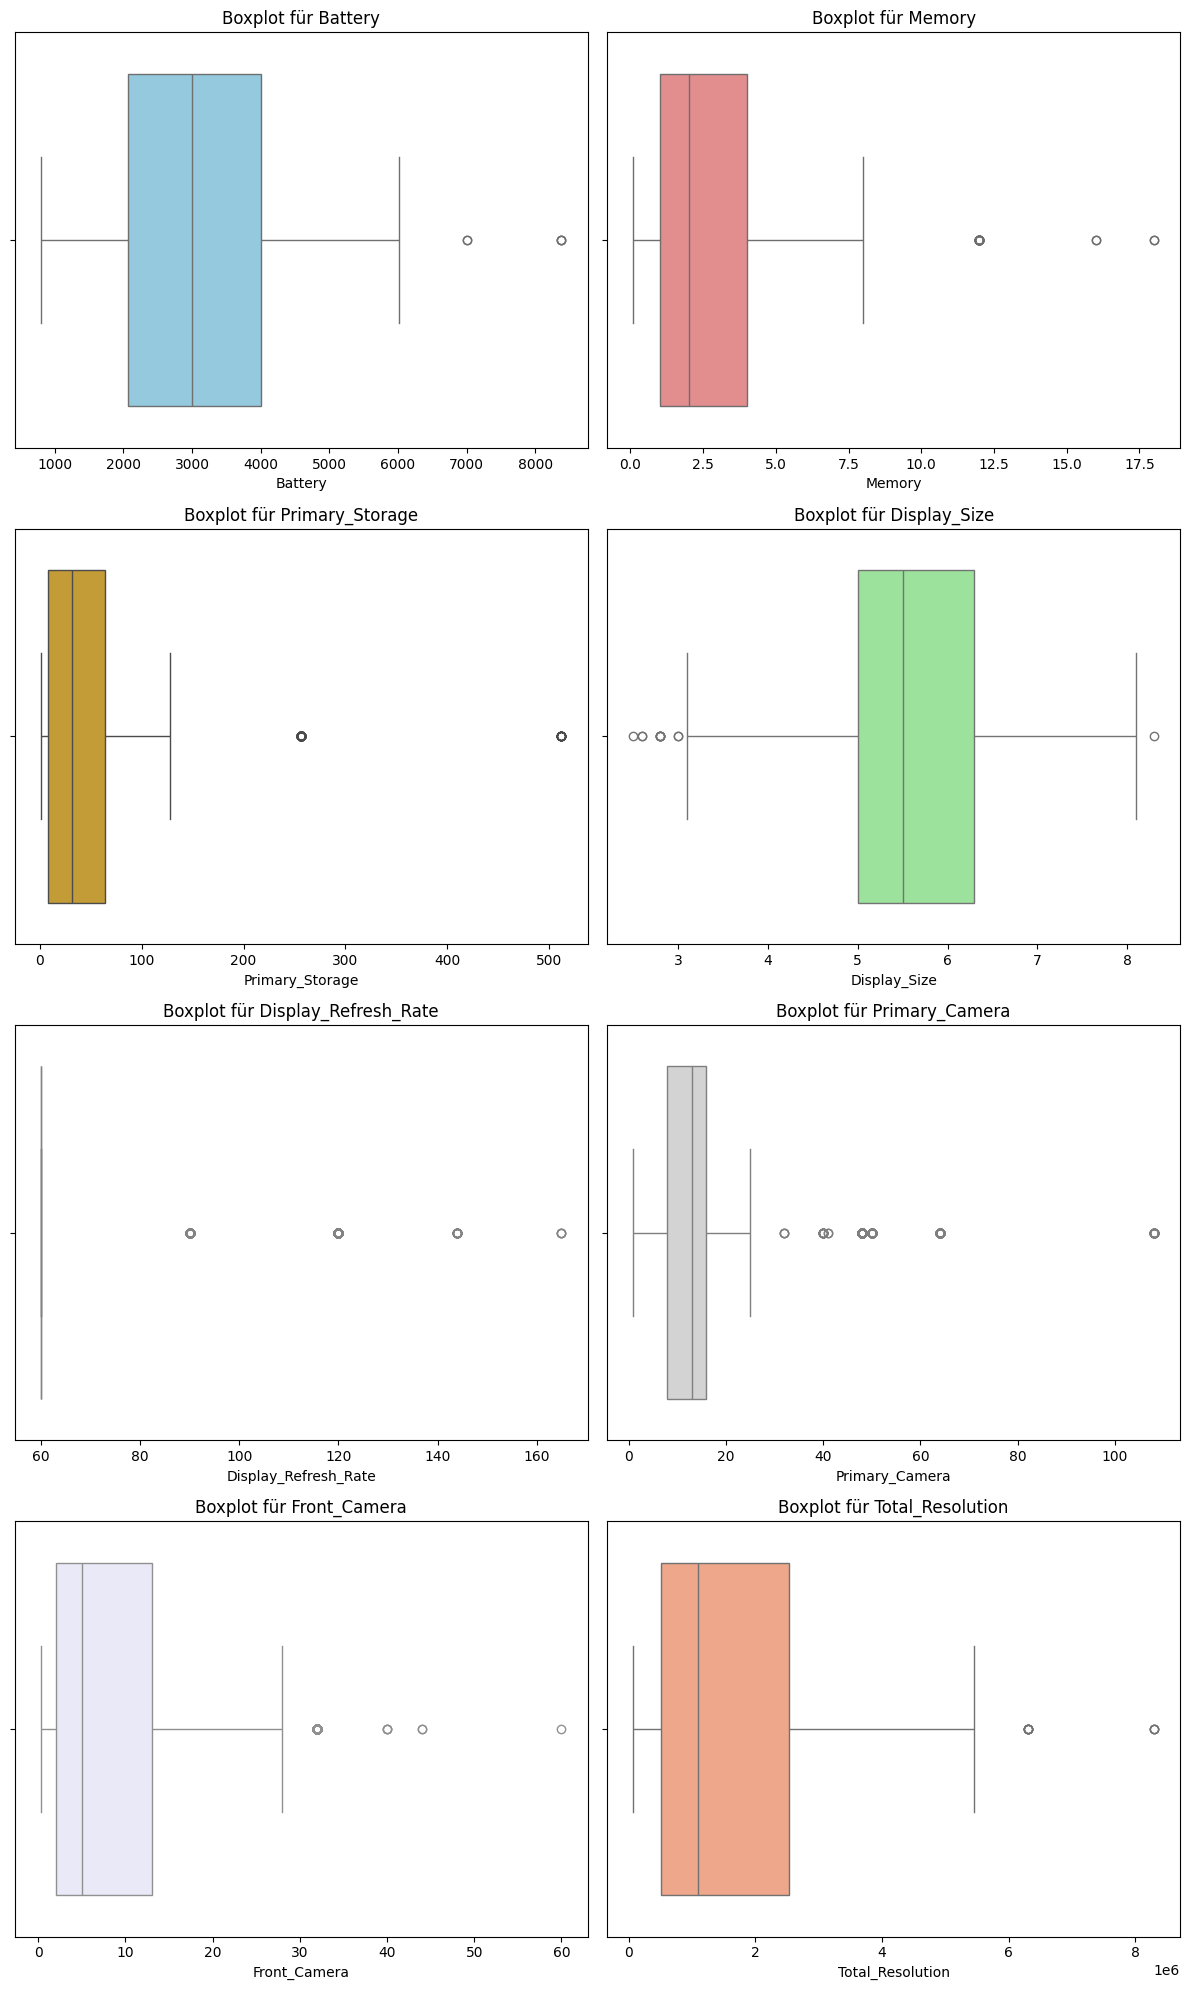

In [88]:
# Liste von Farben
colors = ["skyblue", "lightcoral", "goldenrod", "lightgreen", "lightpink", "lightgrey", "lavender", "lightsalmon"]

columns = ['Battery', 'Memory', 'Primary_Storage', 'Display_Size', 
            'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 'Total_Resolution']

# Funktion zur Berechnung der Ausreißer
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].shape[0]

# 1. Setze das Diagramm-Layout für Histogramme: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Histogramme für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.histplot(cleaned_data[column], ax=axes[row, col], kde=True, color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Histogramm für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

# 2. Setze das Diagramm-Layout für Boxplots: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Boxplots für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.boxplot(x=cleaned_data[column], ax=axes[row, col], color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Boxplot für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()